## What was the change in the price of the stock over time?


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
#%matplotlib widgets


In [2]:
# For reading stock data from yahoo
stock_data = pd.read_csv("/Users/prajesh/Desktop/Project1/Ticker 2021.csv")
stock_data.sort_values(by=["Date"],ascending=False)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Ticker,Year-Month
0,10/1/20,117.64,117.72,115.83,116.79,116120440,AAPL,2020-10
1,10/2/20,112.89,115.37,112.22,113.02,144711986,AAPL,2020-10
2,10/5/20,113.91,116.65,113.55,116.50,106243839,AAPL,2020-10
3,10/6/20,115.70,116.12,112.25,113.16,161498212,AAPL,2020-10
4,10/7/20,114.62,115.55,114.13,115.08,96848985,AAPL,2020-10


In [3]:
#Created variable for the ticker

AAPL = stock_data[stock_data['Ticker']=='AAPL'].groupby("Year-Month").mean()
GOOG = stock_data[stock_data['Ticker']=='GOOG'].groupby("Year-Month").mean()
MSFT = stock_data[stock_data['Ticker']=='MSFT'].groupby("Year-Month").mean()
FB = stock_data[stock_data['Ticker']=='FB'].groupby("Year-Month").mean()
TSLA = stock_data[stock_data['Ticker']=='TSLA'].groupby("Year-Month").mean()

In [4]:
#Created Dataframe for all ticker

AAPL = pd.DataFrame(AAPL)
GOOG = pd.DataFrame(GOOG)
MSFT = pd.DataFrame(MSFT)
FB = pd.DataFrame(FB)
TSLA = pd.DataFrame(TSLA)

stock_list = [AAPL, GOOG, MSFT, FB, TSLA]

In [5]:
#Test
AAPL

,Open,High,Low,Close,Volume
Year-Month,,,,,
2020-10,116.694091,118.274545,114.911364,116.413182,1.316053e+08
2020-11,116.748500,118.199000,115.410500,116.826000,1.061686e+08
2020-12,127.150455,128.608182,125.727727,127.290455,1.056043e+08
2021-1,133.101053,135.070000,130.978947,133.036842,1.179409e+08
2021-10,143.749375,145.108750,142.612500,144.228750,7.327119e+07
2021-2,132.022632,133.066842,129.929474,131.531579,9.652750e+07
2021-3,122.087391,123.471739,120.404783,121.871304,1.152541e+08
2021-4,131.672381,132.911429,130.465238,131.812857,8.999794e+07
2021-5,127.035000,128.158000,125.824000,126.784000,8.559676e+07


In [6]:
# The tech stocks we'll use for this analysis

Ticker = ['AAPL', 'GOOG', 'MSFT', 'FB','TSLA']


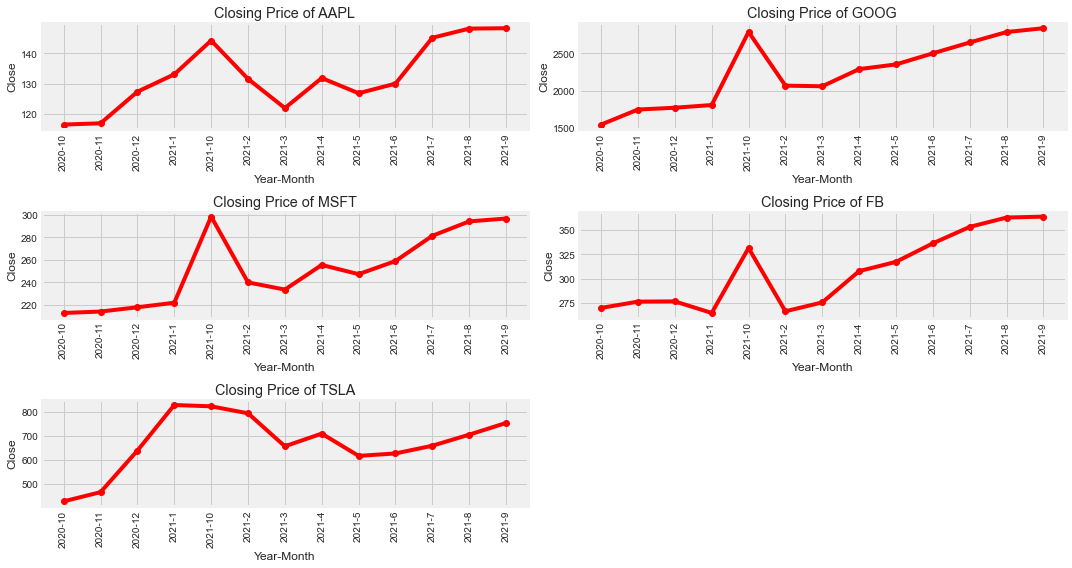

In [21]:
#Analyzing the historical views of the closing price.
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=2, bottom=1.8)

for i, temp_1 in enumerate(stock_list, 1):
    plt.subplot(3, 2, i)
    #temp_1['Close'].plot()
    plt.plot(temp_1['Close'],marker="o",color="r")
    plt.xticks(rotation=90)
    plt.ylabel('Close')
    plt.xlabel('Year-Month')
    plt.title(f"Closing Price of {Ticker[i - 1]}")
    
    
plt.tight_layout()

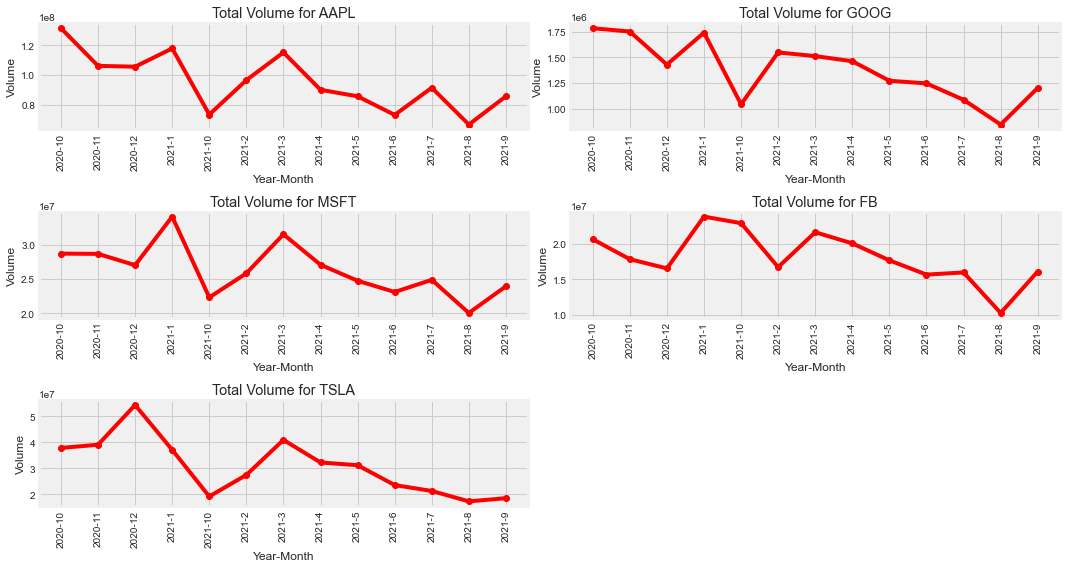

In [22]:
#Analyzing the historical views of the Volume.
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=2, bottom=1.8)
#values = ["Volume"]
#labels = ["Year-Month"]

for i, temp_1 in enumerate(stock_list, 1):
    plt.subplot(3, 2, i)
    #temp_1['Volume'].plot()
    plt.plot(temp_1['Volume'],marker="o",color="r")
    plt.xticks(rotation=90)
    plt.ylabel('Volume')
    plt.xlabel('Year-Month')
    plt.title(f"Total Volume for {Ticker[i - 1]}")
    
    
plt.tight_layout()

## What was the moving average of the various stocks?


In [9]:
stock_ma = pd.read_csv("/Users/prajesh/Desktop/Project1/Ticker 2021.csv")
stock_ma.head()

,Date,Open,High,Low,Close,Volume,Ticker,Year-Month
0,10/1/20,117.64,117.72,115.83,116.79,116120440,AAPL,2020-10
1,10/2/20,112.89,115.37,112.22,113.02,144711986,AAPL,2020-10
2,10/5/20,113.91,116.65,113.55,116.50,106243839,AAPL,2020-10
3,10/6/20,115.70,116.12,112.25,113.16,161498212,AAPL,2020-10
4,10/7/20,114.62,115.55,114.13,115.08,96848985,AAPL,2020-10


In [10]:
mov_avg = [2, 4, 5]

for mv in mov_avg:
    for temp_2 in stock_list:
        column_name = f"MA for {mv} Months"
        temp_2[column_name] = temp_2['Close'].rolling(mv).mean()

In [11]:
print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MA for 2 Months',
       'MA for 4 Months', 'MA for 5 Months'],
      dtype='object')


In [12]:
GOOG.head()

,Open,High,Low,Close,Volume,MA for 2 Months,MA for 4 Months,MA for 5 Months
Year-Month,,,,,,,,
2020-10,1545.697273,1568.015909,1528.148636,1546.828182,1.784561e+06,NaN,NaN,NaN
2020-11,1745.357000,1767.587000,1731.673500,1748.348500,1.752013e+06,1647.588341,NaN,NaN
2020-12,1771.721364,1788.331364,1755.450000,1772.278182,1.430460e+06,1760.313341,NaN,NaN
2021-1,1802.270000,1830.655789,1782.301579,1808.383684,1.741264e+06,1790.330933,1718.959637,NaN
2021-10,2784.073125,2808.848125,2760.610625,2787.688125,1.043894e+06,2298.035905,2029.174623,1932.705335


Text(0.5, 1.0, 'FB')

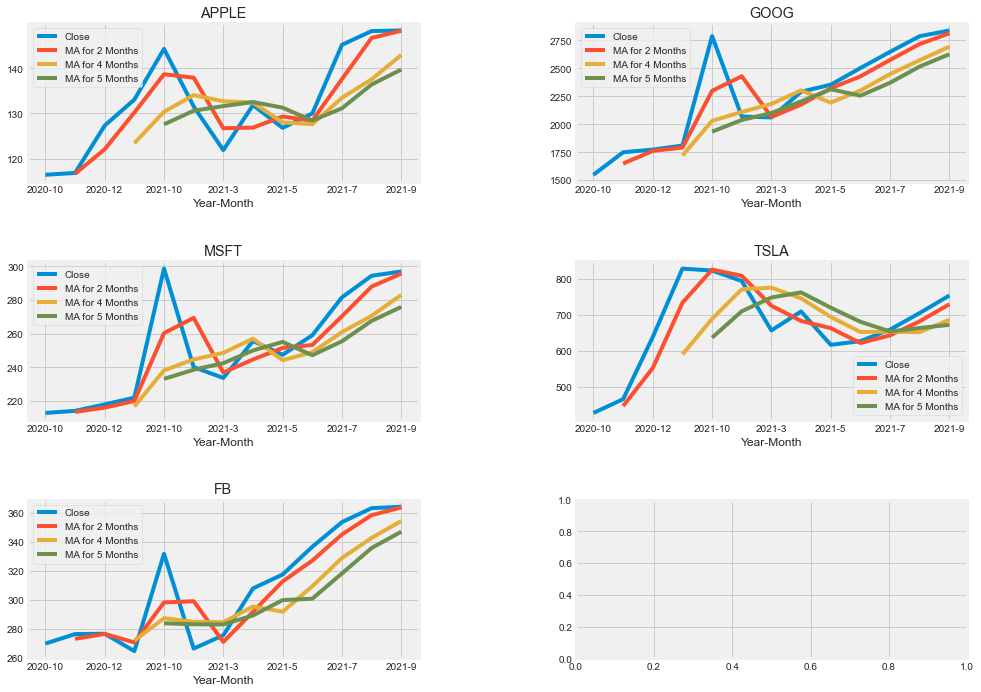

In [20]:

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(9)
fig.set_figwidth(15)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.5, wspace=0.4)


AAPL[['Close', 'MA for 2 Months', 'MA for 4 Months', 'MA for 5 Months']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 2 Months', 'MA for 4 Months', 'MA for 5 Months']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOG')

MSFT[['Close', 'MA for 2 Months', 'MA for 4 Months', 'MA for 5 Months']].plot(ax=axes[1,0])
axes[1,0].set_title('MSFT')

TSLA[['Close', 'MA for 2 Months', 'MA for 4 Months', 'MA for 5 Months']].plot(ax=axes[1,1])
axes[1,1].set_title('TSLA')

FB[['Close', 'MA for 2 Months', 'MA for 4 Months', 'MA for 5 Months']].plot(ax=axes[2,0])
axes[2,0].set_title('FB')


## What was the correlation between different stocks closing prices?


In [14]:
#Creating new dataframe where I am listing stock closing volumes in columns and grouped by Year-Month
temp_df = pd.DataFrame()

for corr,stock_name  in zip(stock_list,Ticker):
    xx = pd.DataFrame(corr['Close']).rename(columns={'Close':stock_name})
    temp_df=pd.concat([temp_df,xx],axis=1)
    
                    
temp_df



,AAPL,GOOG,MSFT,FB,TSLA
Year-Month,,,,,
2020-10,116.413182,1546.828182,212.890455,269.780909,427.209545
2020-11,116.826000,1748.348500,214.139000,276.306500,465.612500
2020-12,127.290455,1772.278182,217.963182,276.530909,638.818636
2021-1,133.036842,1808.383684,221.975263,264.609474,828.776842
2021-10,144.228750,2787.688125,298.563125,331.547500,823.321250
2021-2,131.531579,2068.356842,240.066842,266.337895,794.269474
2021-3,121.871304,2059.844783,233.674348,275.506957,656.802609
2021-4,131.812857,2289.842381,255.580000,307.753810,709.618095
2021-5,126.784000,2352.595500,247.395500,317.336000,616.753000


In [15]:
#Apply a percent change function

stock_returns = temp_df.pct_change()
stock_returns.head()


,AAPL,GOOG,MSFT,FB,TSLA
Year-Month,,,,,
2020-10,NaN,NaN,NaN,NaN,NaN
2020-11,0.003546,0.130280,0.005865,0.024188,0.089893
2020-12,0.089573,0.013687,0.017858,0.000812,0.371996
2021-1,0.045144,0.020372,0.018407,-0.043111,0.297359
2021-10,0.084126,0.541536,0.345029,0.252969,-0.006583


/Users/prajesh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


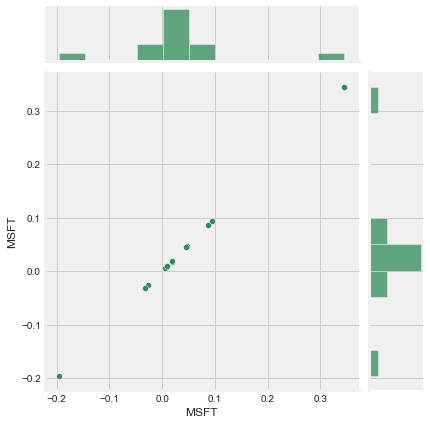

In [16]:
#Below comparison is between Microsoft which shows perfect linear relationship.
sns.jointplot('MSFT', 'MSFT', stock_returns, kind='scatter', color='seagreen')

/Users/prajesh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


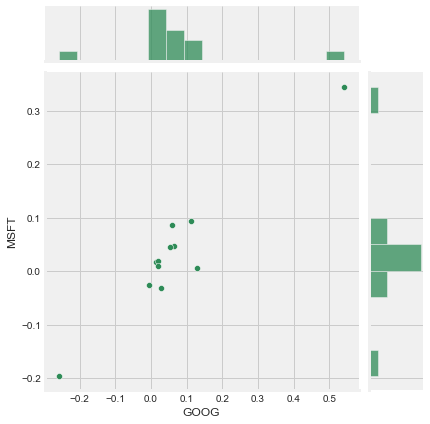

In [17]:
#Below comparison is between MSFT and GOOG which shows liner relationship is not align. They both have different
#trend or scatter over the months.
sns.jointplot('GOOG', 'MSFT', stock_returns, kind='scatter', color='seagreen')

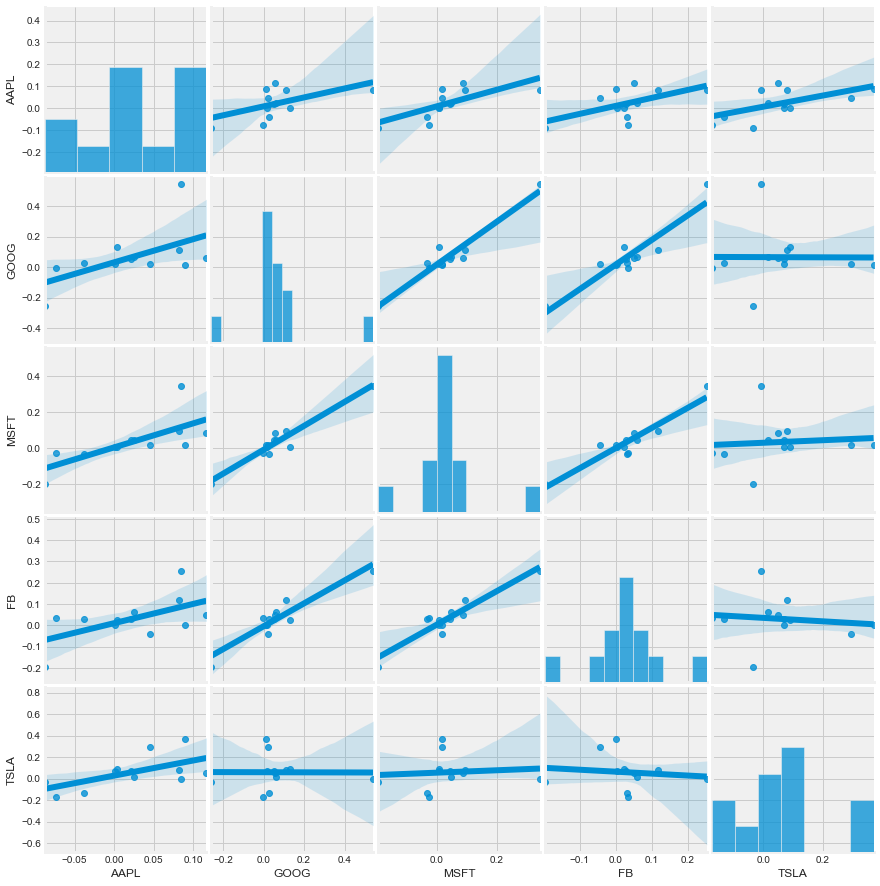

In [18]:
#We are using pairplot for all comparison between stocks.

sns.pairplot(stock_returns, kind='reg')